In [1]:
import pandas as pd

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# large number library:
from gmpy2 import mpz

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv("../data/profile_cbrt.csv").drop_duplicates()
data

,input,initial_value,cbrt_ideal,cbrt_implementation_noguess,cbrt_implementation_guess,gas_used_noguess,gas_used_initial_value
0,0,0,0,0,0,467,467
2,4,158740105196,1587401051968,1587401051968,1587401051968,35308,4120
4,58237,73646695652624,38761418764539,38761418764539,38761418764539,27248,2039
6,28558,3056628065497,30566280654971,30566280654971,30566280654971,27768,4120
8,14352,24301502864654,24301745882113,24301745882113,24301745882113,28548,1000
...,...,...,...,...,...,...,...
24990,48111,3648529580285,36370404232734,36370404232734,36370404232734,27508,4120
24991,40287,65134124077311,34281117935427,34281117935427,34281117935427,27508,2039
24995,3361665902,499340656940335,1498021970821006,1498021970821005,1498021970821005,17888,2820
24998,51294,70595300320874,37155421221513,37155421221513,37155421221513,27248,2039


In [3]:
data.describe()

,gas_used_noguess,gas_used_initial_value
count,11325.000000,11325.000000
mean,26317.788344,2178.089007
std,8026.809894,898.562805
min,467.000000,467.000000
25%,27248.000000,1520.000000
50%,27768.000000,2039.000000
75%,31928.000000,2300.000000
max,36608.000000,4380.000000


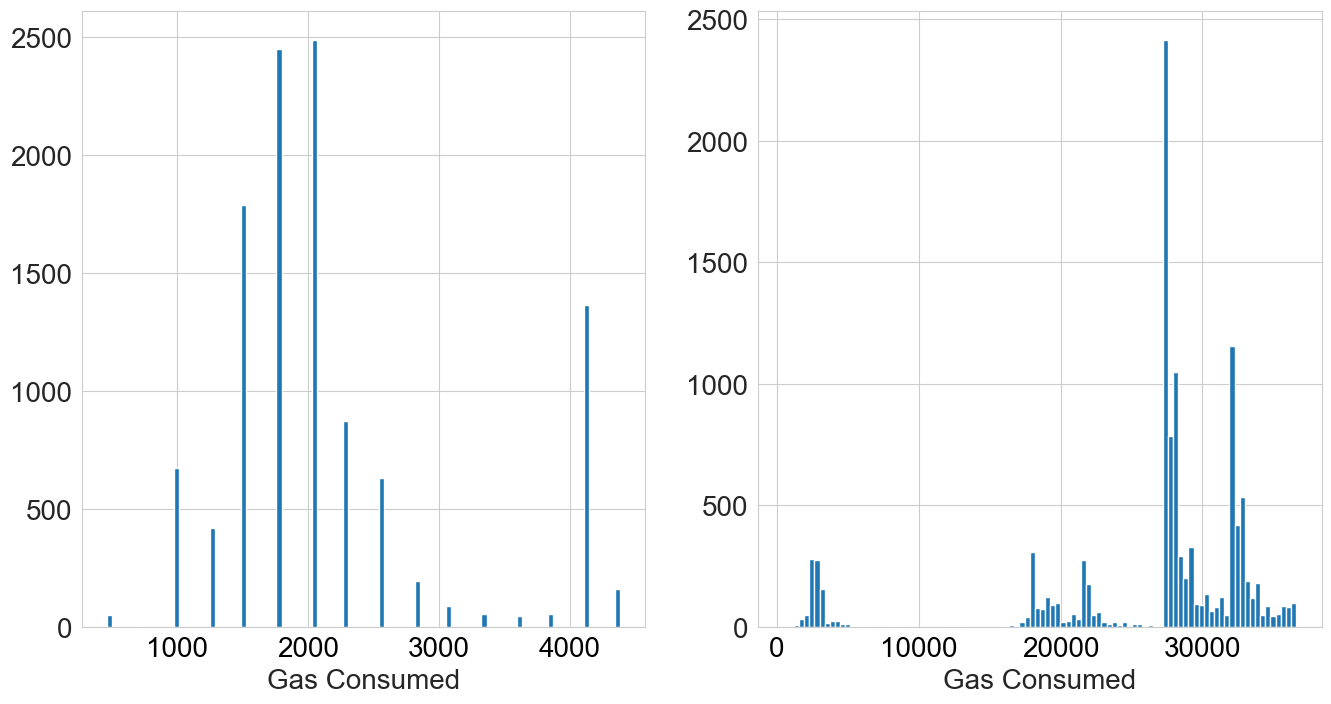

In [4]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))

axes[0].hist(data.gas_used_initial_value, 100)
axes[1].hist(data.gas_used_noguess, 100)

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black')
    ax.set_xlabel("Gas Consumed", fontsize=20)

What's the relationship between initial guess and gas costs?

In [5]:
data_non_zero = data[data.input.apply(lambda x: mpz(x)) != 0]

data_non_zero["initial_value"] = data_non_zero.initial_value.apply(lambda x: mpz(x))
data_non_zero["cbrt_implementation_guess"] = data_non_zero.cbrt_implementation_guess.apply(lambda x: mpz(x))
data_non_zero["perc_diff_guess_output"] = (
    data_non_zero.cbrt_implementation_guess - data_non_zero.initial_value
    ) / data_non_zero.cbrt_implementation_guess
data_non_zero

,input,initial_value,cbrt_ideal,cbrt_implementation_noguess,cbrt_implementation_guess,gas_used_noguess,gas_used_initial_value,perc_diff_guess_output
2,4,158740105196,1587401051968,1587401051968,1587401051968,35308,4120,0.90000000000050395
4,58237,73646695652624,38761418764539,38761418764539,38761418764539,27248,2039,-0.89999999999999747
6,28558,3056628065497,30566280654971,30566280654971,30566280654971,27768,4120,0.90000000000000324
8,14352,24301502864654,24301745882113,24301745882113,24301745882113,28548,1000,1.0000000007360377e-05
10,24857,29184027629212,29184319472407,29184319472407,29184319472407,28028,1000,1.0000000009454735e-05
...,...,...,...,...,...,...,...,...
24990,48111,3648529580285,36370404232734,36370404232734,36370404232734,27508,4120,0.89968410697505363
24991,40287,65134124077311,34281117935427,34281117935427,34281117935427,27508,2039,-0.89999999999999125
24995,3361665902,499340656940335,1498021970821006,1498021970821005,1498021970821005,17888,2820,0.66666666666666663
24998,51294,70595300320874,37155421221513,37155421221513,37155421221513,27248,2039,-0.89999999999998115


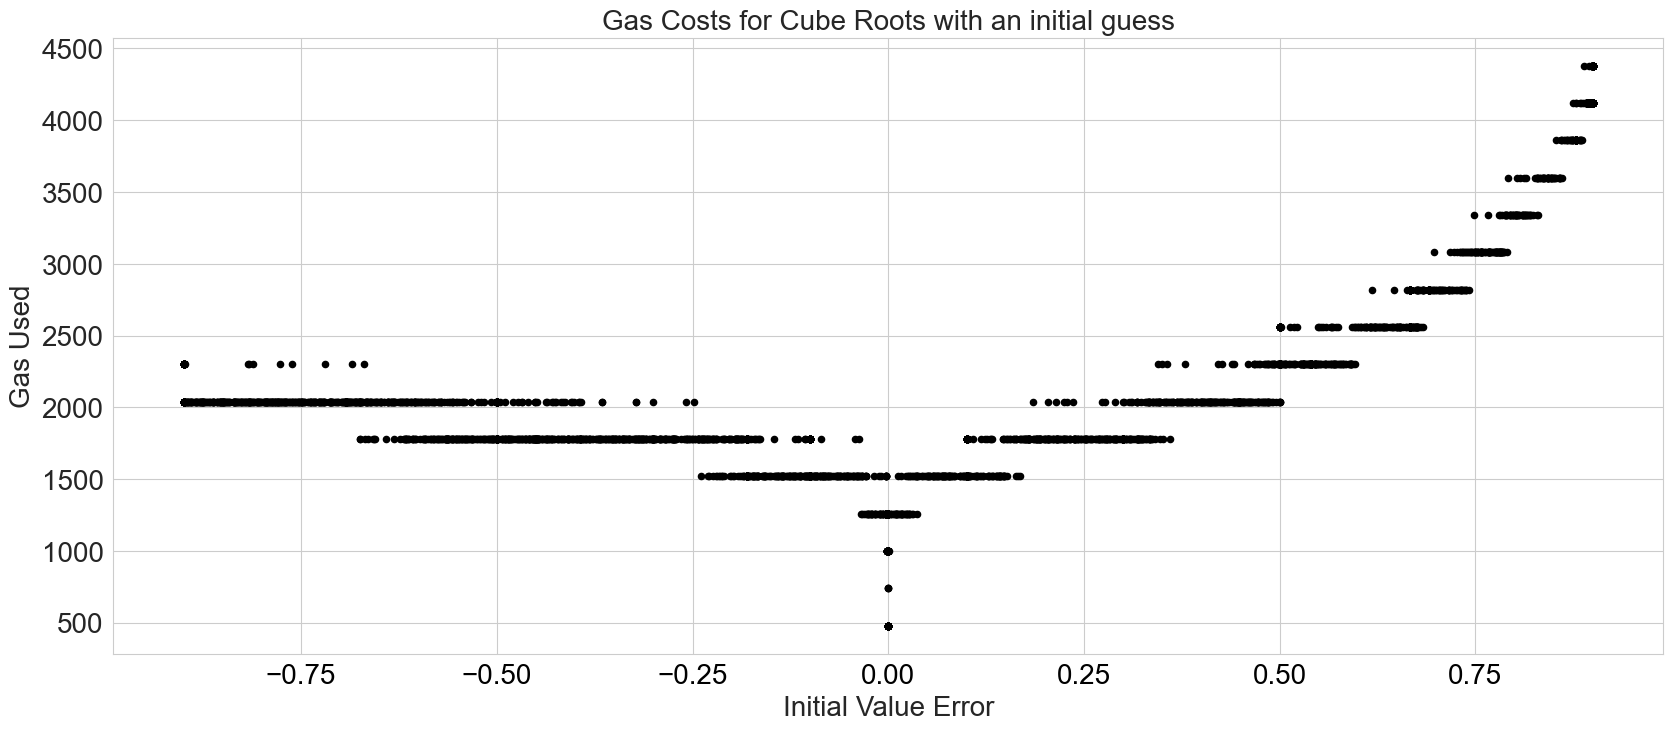

In [6]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    data_non_zero.perc_diff_guess_output,
    data_non_zero.gas_used_initial_value,
    s=20,
    color="black",
)

ax.set_xlabel("Initial Value Error", fontsize=20)
ax.set_ylabel("Gas Used", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.set_title("Gas Costs for Cube Roots with an initial guess", fontsize=20);


So it's much better to undershoot the initial guess rather than overshoot it. The implication here is, in the case of Geometric mean for three numbers, the Arithmetic mean is always smaller (so it can be a good initial value).